In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [ ]:
cars = pd.read_csv('Car Sale.csv')

In [ ]:
cars

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
#1: What is the average selling price of cars for each dealer, and how does it compare across different dealers?
average_price_per_dealer = cars.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

#Top 10 average selling price by dealers
print(average_price_per_dealer.reset_index().head(10))

                         Dealer_Name     Price ($)
0                          U-Haul CO  28769.919006
1                      Classic Chevy  28602.014446
2               Rabun Used Car Sales  28527.536177
3                    Iceberg Rentals  28522.958533
4              Enterprise Rent A Car  28312.580800
5  Scrivener Performance Engineering  28297.371589
6         Gartner Buick Hyundai Saab  28247.621019
7                   Saab-Belle Dodge  28190.139888
8                        Capitol KIA  28189.703822
9                      Race Car Help  28163.372706


In [ ]:
#2: Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
cars_price_variation = cars.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(cars_price_variation.head(10))

Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Buick       17142.232626
Mercury     16445.172195
Nissan      16214.264017
Saturn      15990.223671
Ford        15849.090227
Name: Price ($), dtype: float64


In [ ]:
#Lincoln has the highest variation in prices and talking about the pricing trends, these brands likely cater to both premium and mid-range segments, leading to significant differences in their car prices.
#This highlights a diverse product line with options for various customer segments.

In [ ]:
#3: What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

#distribution of car prices for each transmission type
car_price_per_transmission_distribution = cars.groupby('Transmission')['Price ($)'].describe()

# Extracting interquartile ranges (IQR) for each transmission type
car_price_per_transmission_distribution['IQR'] = (car_price_per_transmission_distribution['75%'] - car_price_per_transmission_distribution['25%'])
print(car_price_per_transmission_distribution)

                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max      IQR  
Transmission                             
Auto          35500.0  75700.0  16500.0  
Manual        34000.0  85800.0  17000.0  


In [ ]:
#4: What is the distribution of car prices across different regions?
car_price_per_region_distribution = cars.groupby('Dealer_Region')['Price ($)'].describe()
print(car_price_per_region_distribution)

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

In [ ]:
#5: What is the distribution of cars based on body styles?
car_body_style_distribution = cars['Body Style'].value_counts()
print(car_body_style_distribution)


Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [ ]:
#6: How does the average selling price of cars vary by customer gender and annual income?
avg_selling_price = cars.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
print(avg_selling_price)

      Gender  Annual Income     Price ($)
0     Female          13500  28132.038732
1     Female         106000  46001.000000
2     Female         121000  20000.000000
3     Female         190000  19001.000000
4     Female         211000  51000.000000
...      ...            ...           ...
3437    Male        6600000  39000.000000
3438    Male        6800000  15000.000000
3439    Male        7650000  21000.000000
3440    Male        8000000  85000.000000
3441    Male       11200000  26001.000000

[3442 rows x 3 columns]


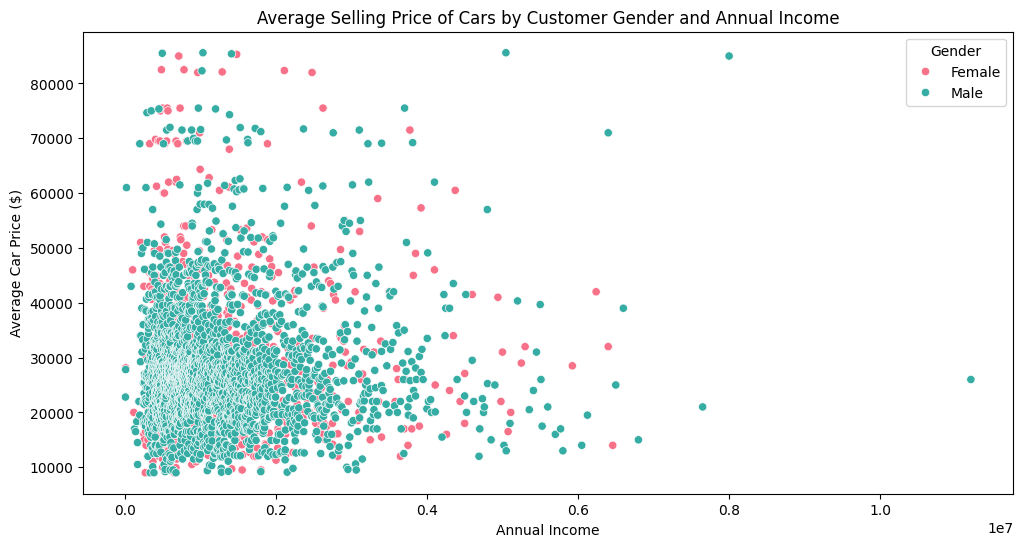

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=avg_selling_price, palette='husl')
plt.title('Average Selling Price of Cars by Customer Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Car Price ($)')
plt.legend(title='Gender')
plt.show()

Inights:
- **Higher income customers** tend to buy more expensive cars, with prices increasing as income rises.
- **Gender differences** in car prices may show whether men or women are spending more, with trends possibly varying at different income levels.
- The interaction between **gender and income** can reveal if one group consistently spends more on cars.

In [ ]:
#8: How does the average car price differ between cars with different engine sizes?
avg_price_per_engine_size = cars.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_per_engine_size)


Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [ ]:
#Insights
#cars with bigger engine size i.e. DoubleÂ Overhead Camshaft tends to be more expensive than smalller engines i.e. Overhead Camshaft

  Income Bracket    Price ($)
0           <50k  27884.29782
1       50k-100k  43000.00000
2      100k-150k  23200.20000
3      150k-200k  22650.40000
4          200k+  28152.04346


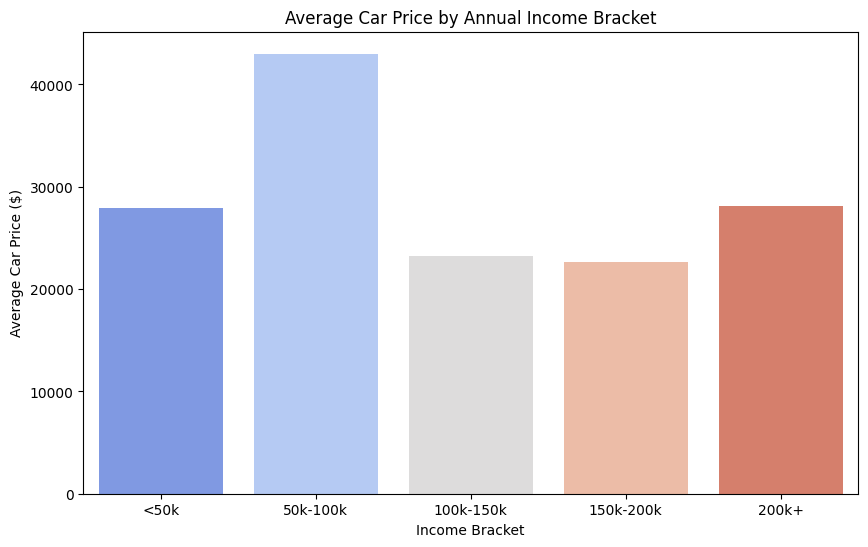

In [ ]:
#9: How do car prices vary based on the customer’s annual income bracket?
# Define income brackets
bins = [0, 50000, 100000, 150000, 200000, float('inf')]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
cars['Income Bracket'] = pd.cut(cars['Annual Income'], bins=bins, labels=labels)

# Group by Income Bracket and calculate average car price
price_by_income_bracket = cars.groupby('Income Bracket')['Price ($)'].mean().reset_index()

# Display the result
print(price_by_income_bracket)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Bracket', y='Price ($)', data=price_by_income_bracket, palette='coolwarm')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.show()


### Insights You Can Expect:
1. **Higher income brackets** (e.g., `100k+`) will likely correlate with **higher car prices**, as wealthier customers may prefer premium or luxury cars.
2. **Lower income brackets** (e.g., `<50k`) might show lower average car prices, indicating a preference for more affordable vehicles.
3. **Middle-income brackets** could show a mix of both budget-friendly and mid-range vehicles, depending on customer preferences.

        Model  Sales Count
0    Diamante          418
1  Silhouette          411
2       Prizm          411
3      Passat          391
4  Ram Pickup          383


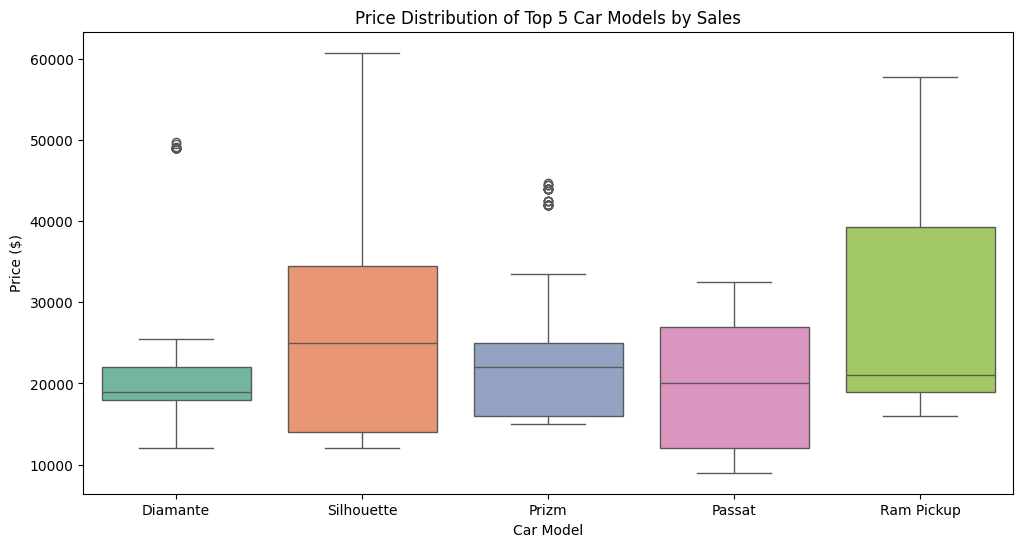

In [ ]:
#10: What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = cars['Model'].value_counts().head(5).reset_index()
top_5_models.columns = ['Model', 'Sales Count']
print(top_5_models)

top_5_models = cars['Model'].value_counts().head().index
top_5_models_sales = cars[cars['Model'].isin(top_5_models)]


# Visualize price distribution for the top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_models_sales, palette='Set2', order=top_5_models)
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.show()

### Insights You Can Expect:
1. **Top 5 Car Models**:
   - These are the models with the highest number of sales, reflecting customer preferences and market demand.
   
2. **Price Distributions**:
   - A **box plot** will show the range, median, and any outliers in the prices of the top models.
   - Some models may have wider price ranges (e.g., if they include budget and premium trims), while others may be more consistent.

In [ ]:
#11: How does car price vary with engine size across different car colors, and which colors have the highest price variation?
price_by_engine_color = cars.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()
print(price_by_engine_color)

                      Engine       Color     Price ($)
0  DoubleÂ Overhead Camshaft       Black  25766.451103
1  DoubleÂ Overhead Camshaft  Pale White  30347.987460
2  DoubleÂ Overhead Camshaft         Red  27434.392314
3          Overhead Camshaft       Black  31732.967164
4          Overhead Camshaft  Pale White  24327.767694
5          Overhead Camshaft         Red  30153.405229


In [ ]:
#Insights
#DoubleÂ Overhead Camshaft tends to be cheaper than Overhead Camshaft in case of Black and Red colors but expensive in case of Pale White color.
#Pale White have the highest price variation

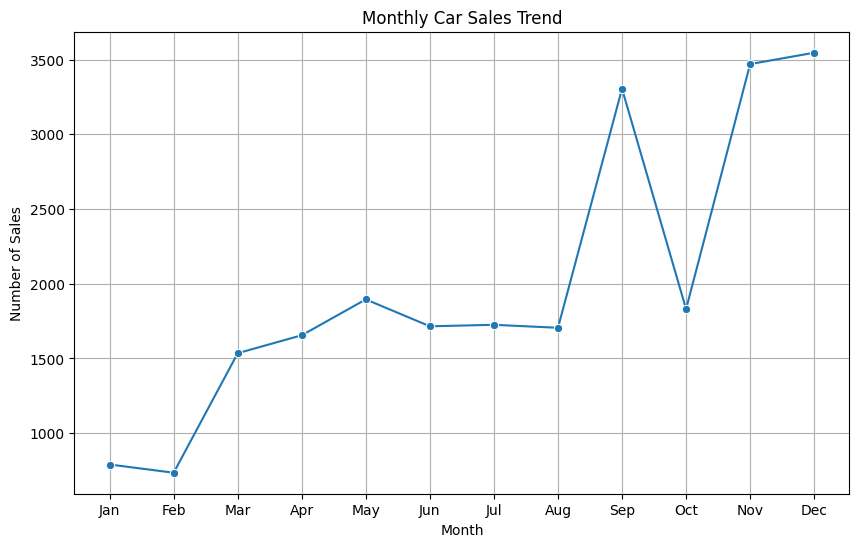

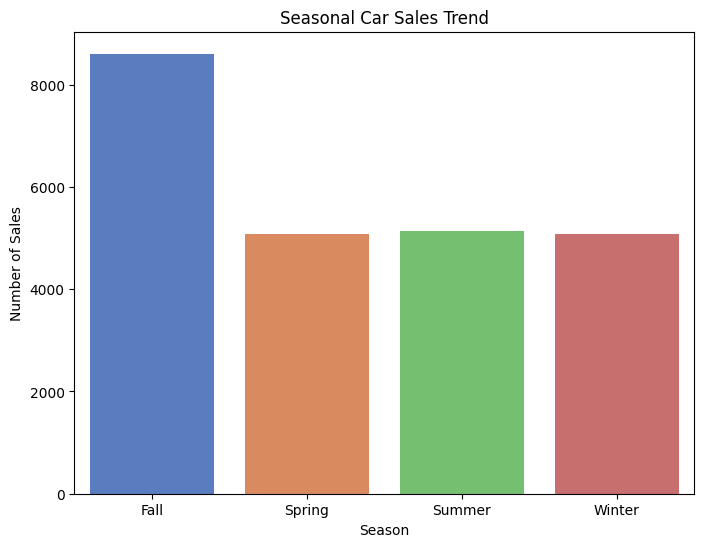

In [ ]:
#12: Is there any seasonal trend in car sales based on the date of sale?
# Convert the 'Date' column to datetime format (if not already done)
cars['Date'] = pd.to_datetime(cars['Date'])

# Extract month and season from the date
cars['Month'] = cars['Date'].dt.month
cars['Season'] = cars['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                     3: 'Spring', 4: 'Spring', 5: 'Spring',
                                     6: 'Summer', 7: 'Summer', 8: 'Summer',
                                     9: 'Fall', 10: 'Fall', 11: 'Fall'})

# Group by Month and Season
monthly_sales = cars.groupby('Month').size().reset_index(name='Sales')
seasonal_sales = cars.groupby('Season').size().reset_index(name='Sales')

# Visualize Monthly Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Visualize Seasonal Trends
plt.figure(figsize=(8, 6))
sns.barplot(x='Season', y='Sales', data=seasonal_sales, palette='muted')
plt.title('Seasonal Car Sales Trend')
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.show()

### Insights You Can Expect:
1. **Monthly Trends**:
   - Some months may show spikes in sales, e.g., **end-of-year sales** (December) or **tax refund season** (March–April).

2. **Seasonal Trends**:
   - **Winter**: Might show higher sales due to holiday discounts.
   - **Spring/Summer**: Often associated with higher sales as customers may prefer buying cars in better weather.

3. If no clear trends emerge, it could indicate that sales are evenly distributed throughout the year.

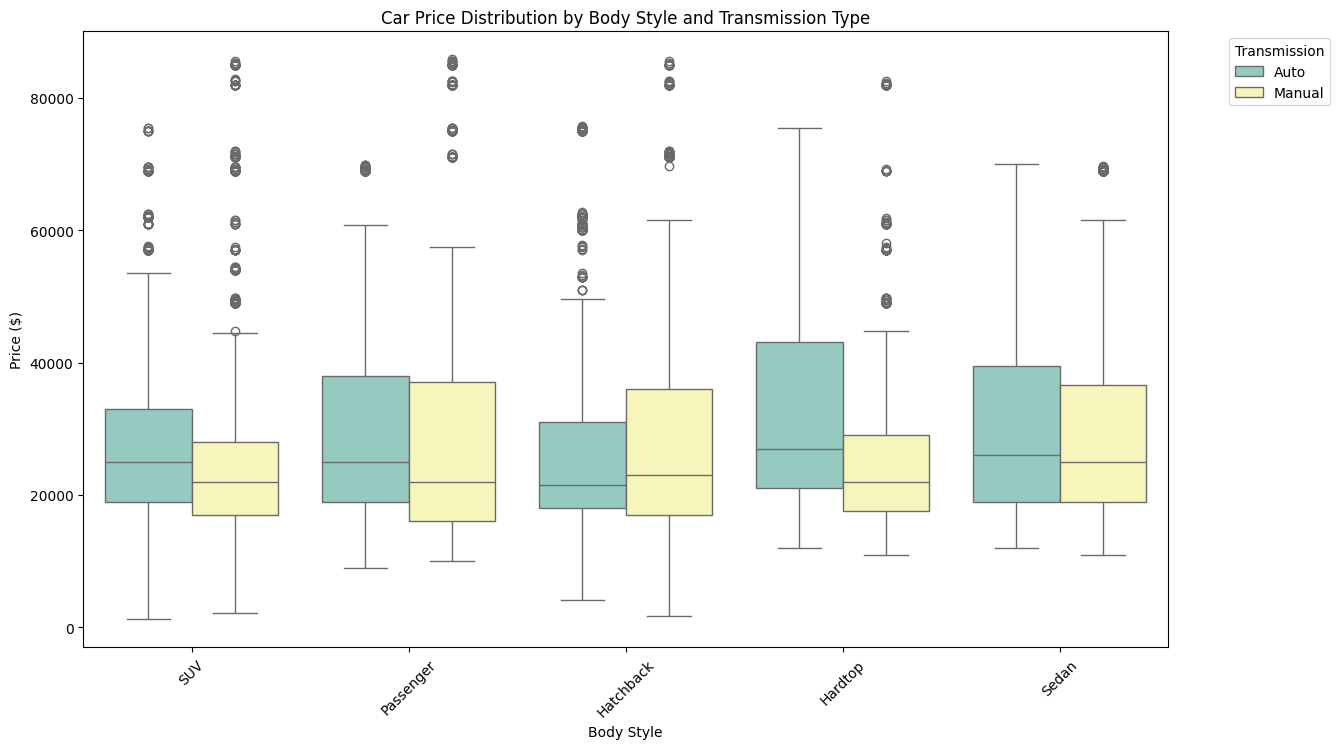

In [ ]:
#13: How does the car price distribution change when considering different combinations of body style and transmission type?
# Group by Body Style and Transmission Type to calculate price statistics
price_by_body_transmission = cars.groupby(['Body Style', 'Transmission'])['Price ($)']

# Boxplot to visualize the distribution of car prices
plt.figure(figsize=(14, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=cars, palette='Set3')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.legend(title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()



### Expected Observations:
- SUVs with Automatic transmissions might have the highest price range due to premium models.
- Manual transmissions might dominate lower price segments, especially for Hatchbacks.
- Certain combinations (e.g., Sedans with CVT) might show narrower price ranges.

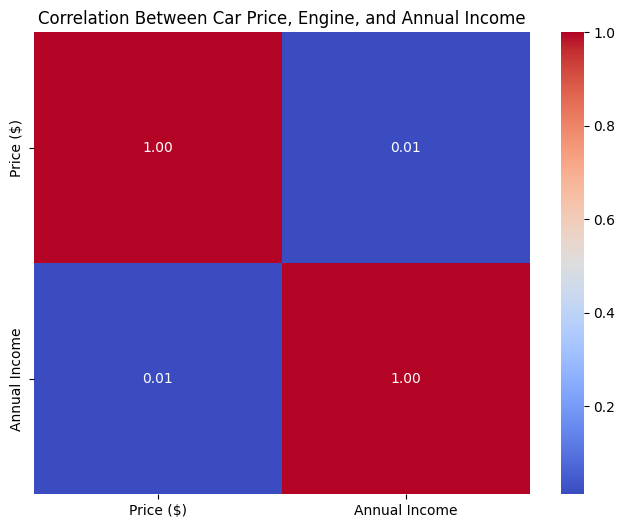

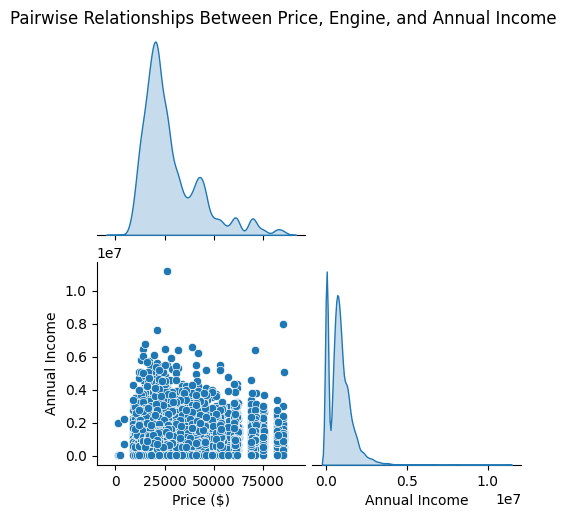

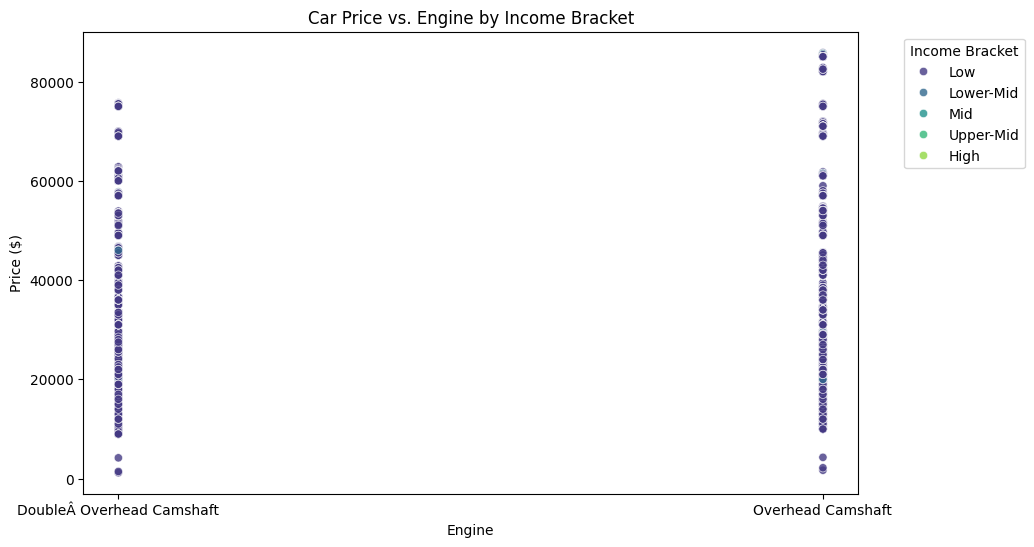

In [ ]:
#14: What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

# Select relevant columns for correlation (replacing 'Engine Size' with 'Engine')
relevant_features = cars[['Price ($)', 'Annual Income']]

# Calculate correlation matrix
correlation_matrix = relevant_features.corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Car Price, Engine, and Annual Income')
plt.show()

# Pairplot for feature interaction
sns.pairplot(data=relevant_features, diag_kind='kde', corner=True, kind='scatter')
plt.suptitle('Pairwise Relationships Between Price, Engine, and Annual Income', y=1.02)
plt.show()

# Further Analysis: Group by income brackets and examine trends
cars['Income Bracket'] = pd.cut(cars['Annual Income'], bins=5, labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars, x='Engine', y='Price ($)', hue='Income Bracket', palette='viridis', alpha=0.8)
plt.title('Car Price vs. Engine by Income Bracket')
plt.xlabel('Engine')
plt.ylabel('Price ($)')
plt.legend(title='Income Bracket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights You Can Expect:

1. **Correlation Heatmap**:
   - Expect **high correlation** between **engine size** and **car price** (e.g., larger engines often indicate higher car prices).
   - **Annual income** may show a moderate correlation with **price**, reflecting that wealthier customers tend to buy more expensive cars.

2. **Pairplot**:
   - Scatterplots show direct relationships (e.g., increasing price with engine size or income).
   - KDE plots on the diagonal indicate the distribution of each variable.

3. **Scatterplot (Income Brackets)**:
   - Customers in **higher income brackets** may prefer cars with larger engines and higher prices.
   - **Lower-income customers** may concentrate in the lower engine size and price segments.

---

### Expected Observations:
- Strong positive correlation between **engine size** and **price**.
- Moderate correlation between **annual income** and **price**, with higher income enabling access to pricier cars.
- Interactions reveal that income influences the type of cars customers choose.

In [ ]:
#15: How does the average car price vary across different car models and engine types?
price_by_model_engine = cars.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(price_by_model_engine.sort_values(by='Price ($)', ascending=False))

        Model                     Engine     Price ($)
212        SC          Overhead Camshaft  61074.818182
198    Ranger  DoubleÂ Overhead Camshaft  61064.055556
222     Sable          Overhead Camshaft  61039.770833
56     Catera  DoubleÂ Overhead Camshaft  56836.933333
143     LX470          Overhead Camshaft  54037.490196
..        ...                        ...           ...
15         A4          Overhead Camshaft  12046.220000
241    Taurus  DoubleÂ Overhead Camshaft  11665.538462
98     Escort          Overhead Camshaft  11403.866667
129  Intrepid          Overhead Camshaft  11069.882353
155    Mirage  DoubleÂ Overhead Camshaft   9063.368421

[261 rows x 3 columns]


###### Expected Insights:
   - Luxury models or SUVs tend to have higher average prices compared to compact models.


   - Smaller engines may be more affordable and dominate entry-level models as compared bigger engines.
